In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [4]:
cc = pd.read_csv("creditcard.csv")

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
cc['Class'] = cc['Class'].astype('bool')

In [7]:
train, test = train_test_split(cc, test_size=0.2, random_state=42)

In [8]:
feat_cols = cc.drop(['Class'], axis=1).columns

In [7]:
vanilla = linear_model.LogisticRegression(C=10000000000000)
X_train = train[feat_cols]
Y_train = train['Class']
vanilla.fit(X_train, Y_train)

LogisticRegression(C=10000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
X_test = test[feat_cols]
Y_test = test['Class']

In [9]:
Y_pred = vanilla.predict(X_test)

In [10]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [11]:
print(tn, fp)
print(fn, tp)
# want to minimize false negatives

56853 11
46 52


In [12]:
vanilla.predict_proba(X_test)

array([[  1.72553356e-06,   9.99998274e-01],
       [  9.99462428e-01,   5.37572434e-04],
       [  9.98462776e-01,   1.53722417e-03],
       ..., 
       [  9.95714688e-01,   4.28531175e-03],
       [  9.99819584e-01,   1.80415794e-04],
       [  9.99807677e-01,   1.92322974e-04]])

In [13]:
Y_score = vanilla.predict_proba(X_test)

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = [None, None]
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(Y_test, Y_score[:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [15]:
roc_df = pd.DataFrame({"fpr": fpr[1], "tpr": tpr[1], "thres": thresholds[1]})

In [16]:
triples = roc_df.apply(lambda x: (x["fpr"], x["tpr"], x["thres"]), axis=1)

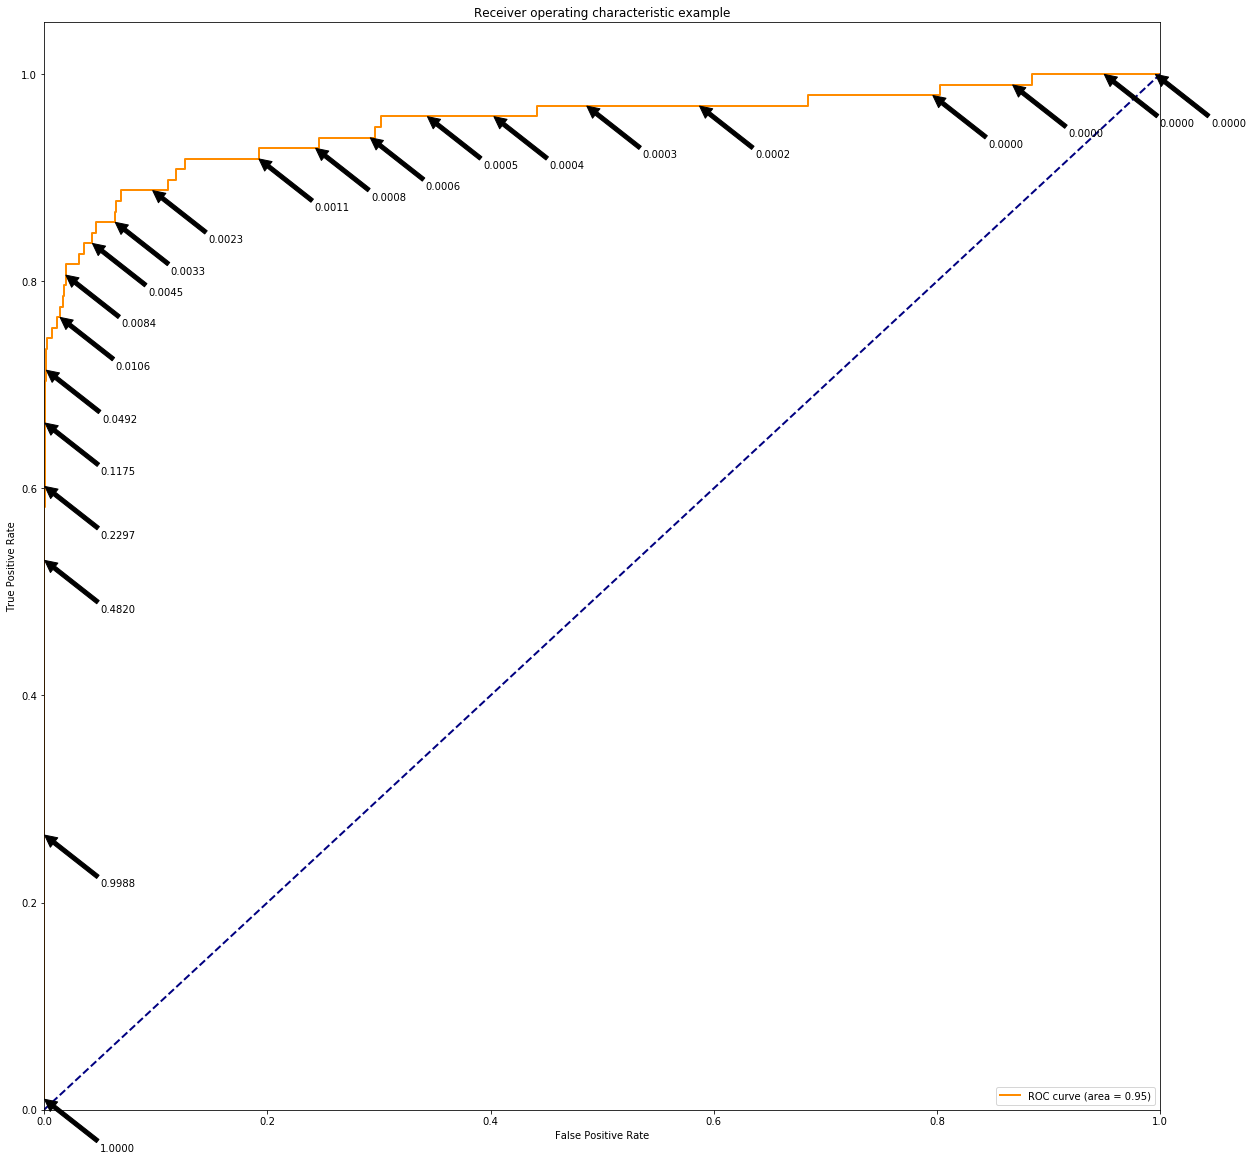

In [17]:
fig = plt.figure(figsize=(20,20))
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

ax = fig.add_subplot(111)
timing = 0
for x, y, thres in triples:
    if timing % 10 == 0:
        ax.annotate("{:.{}f}".format(thres, 4), xy=(x, y), xytext=(x+.05, y+-.05),
                   arrowprops=dict(facecolor='black', shrink=0.005))
    timing += 1

plt.show()

In [18]:
vanilla.predict_proba(X_test)

array([[  1.72553356e-06,   9.99998274e-01],
       [  9.99462428e-01,   5.37572434e-04],
       [  9.98462776e-01,   1.53722417e-03],
       ..., 
       [  9.95714688e-01,   4.28531175e-03],
       [  9.99819584e-01,   1.80415794e-04],
       [  9.99807677e-01,   1.92322974e-04]])

In [19]:
vanilla.classes_

array([False,  True], dtype=bool)

In [20]:
test_df = pd.DataFrame(vanilla.predict_proba(X_test))

In [21]:
Y_test_concat = Y_test.reset_index()
test_df = pd.concat([test_df, Y_test_concat], axis=1, ignore_index=True)
test_df = test_df.drop([2], axis=1)
test_df['>.5'] = test_df[1] > .5
test_df['>.002'] = test_df[1] > .002

In [23]:
true_positive_1 = ((test_df[3] == True) & (test_df['>.5'] == True)).sum()
true_negative_1 = ((test_df[3] == False) & (test_df['>.5'] == False)).sum()
false_positive_1 = ((test_df[3] == False) & (test_df['>.5'] == True)).sum()
false_negative_1 = ((test_df[3] == True) & (test_df['>.5'] == False)).sum()
# reminder prediction is along the horizontal
print("Predicted")
print("0     ", "1")
print("___________")
print(true_negative_1, false_positive_1)
print(false_negative_1, true_positive_1)

Predicted
0      1
___________
56853 11
46 52


In [24]:
true_positive_2 = ((test_df[3] == True) & (test_df['>.002'] == True)).sum()
true_negative_2 = ((test_df[3] == False) & (test_df['>.002'] == False)).sum()
false_positive_2 = ((test_df[3] == False) & (test_df['>.002'] == True)).sum()
false_negative_2 = ((test_df[3] == True) & (test_df['>.002'] == False)).sum()
# reminder prediction is along the horizontal
print("Predicted")
print("0     ", "1")
print("___________")
print(true_negative_2, false_positive_2)
print(false_negative_2, true_positive_2)

Predicted
0      1
___________
50596 6268
11 87


In [25]:
print("Overall Accuracy >.5: ", (test_df[3] == test_df['>.5']).sum()/len(test_df[3]))
print("Overall Accuracy >.002: ", (test_df[3] == test_df['>.002']).sum()/len(test_df[3]))
print("Sensitivity/Fraud accuracy, >.5: ", true_positive_1 / (true_positive_1 + false_negative_1))
print("Sensitivity/Fraud accuracy, >.002: ", true_positive_2 / (true_positive_2 + false_negative_2))

Overall Accuracy >.5:  0.998999332889
Overall Accuracy >.002:  0.889768617675
Sensitivity/Fraud accuracy, >.5:  0.530612244898
Sensitivity/Fraud accuracy, >.002:  0.887755102041
